# Flight Fare Prediction datasets

About Dataset
INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

DATA COLLECTION AND METHODOLOGY
Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022.
Data source was secondary data and was collected from Ease my trip website.

DATASET
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
pwd()

'C:\\Users\\HP'

In [5]:
df=pd.read_csv("Airline Prediction datase.csv")
df

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,?,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,$,1,5956
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49,81585


# features and target separation

In [6]:
features=df.iloc[:,:-1]
features

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,?,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,$,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


# describe() is used to give Statistical Information of Dataset. The total count column displays some missing values .

In [7]:
df.describe()

,sr.no,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,150076.000000,26.004751,20889.660523
std,86646.852011,13.561004,22697.767366
min,0.000000,1.000000,1105.000000
25%,75038.000000,15.000000,4783.000000
50%,150076.000000,26.000000,7425.000000
75%,225114.000000,38.000000,42521.000000
max,300152.000000,49.000000,123071.000000


# It display the information about data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sr.no             300153 non-null  int64 
 1   airline           300153 non-null  object
 2   flight            300153 non-null  object
 3   source_city       300153 non-null  object
 4   departure_time    300153 non-null  object
 5   stops             300153 non-null  object
 6   arrival_time      300153 non-null  object
 7   destination_city  300153 non-null  object
 8   class             300153 non-null  object
 9   duration          300153 non-null  object
 10  days_left         300153 non-null  int64 
 11  price             300153 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 27.5+ MB


# separate the target column

In [9]:
target=df.iloc[:,-1]
target

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

# Handling missing values with SimpleImputer.

In [10]:
features.isnull().sum()

sr.no               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [11]:
features

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,?,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,$,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [12]:
features["stops"].unique() # find unique value in stops column  and change the unwanted data

array(['0', '?', '1', '2', 1, 0, 2], dtype=object)

In [13]:
features["stops"].replace("?",np.nan,inplace=True)

In [14]:
features # lets check the Changed data in Stops columns

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,NaN,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,$,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [15]:
features["class"].unique() # find unique value in stops column and change the unwanted data

array(['Economy', '#', 'Business'], dtype=object)

In [16]:
features["class"].replace("#",np.nan,inplace=True)

# let's check the data 

In [17]:
features # lets check the Changed data in class columns

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,NaN,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,$,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [18]:
features["duration"].unique() #  find unique value in stops column and change the unwanted data

array(['2.17', '2.33', '$', '2.25', '2.08', '2.44', '12.25', '16.33',
       '11.75', '14.5', '3.75', '2.5', '5.83', '8', '6', '16.17', '18',
       '23.17', '24.17', '8.83', '4.5', '15.25', '11', '19.08', '22.83',
       '26.42', '17.75', '19.58', '15.17', '20.83', '11.42', '22.25',
       '26', '21.75', '3.83', '4.42', '7.67', '8.33', '10.42', '23.75',
       '19.5', '6.5', '12.42', '21.08', '26.67', '28.17', '28.25', '9.25',
       '17.92', '7.08', '13.83', '7.58', '15.83', '24.42', '4.17', '4.25',
       '5.08', '29.33', '17', '27.17', '24.75', '5.75', '12.75', '13.75',
       '17.83', '5.5', '23.83', '5', '26.5', '12.83', '8.92', '11.17',
       '12.17', '15.58', '15.75', '7.92', '13.25', '16', '22.75', '6.33',
       '7.25', '30.08', '18.25', '6.08', '2', '12.33', '3.5', '10.25',
       '14.17', '25.58', '4.08', '9.75', '6.67', '9.67', '14.67', '10.08',
       '12.58', '7', '8.25', '15.5', '10.17', '23.5', '25.75', '11.5',
       '21.42', '14.25', '7.75', '5.33', '5.67', '4.75', 

In [19]:
features["duration"].replace("$",np.nan,inplace=True)

In [20]:
features # lets check the Changed data in duration columns

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,NaN,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,NaN,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [21]:
features.isnull().sum() # Handling missing values

sr.no                0
airline              0
flight               0
source_city          0
departure_time       0
stops               31
arrival_time         0
destination_city     0
class               23
duration            26
days_left            0
dtype: int64

In [22]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sr.no             300153 non-null  int64 
 1   airline           300153 non-null  object
 2   flight            300153 non-null  object
 3   source_city       300153 non-null  object
 4   departure_time    300153 non-null  object
 5   stops             300122 non-null  object
 6   arrival_time      300153 non-null  object
 7   destination_city  300153 non-null  object
 8   class             300130 non-null  object
 9   duration          300127 non-null  object
 10  days_left         300153 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 25.2+ MB


# We have found 3 columns having NAN values. And we have to replace the NULL values with some common values.

# Let us fill in the missing values for numerical terms using mode operation.

In [23]:
features["stops"].fillna(features["stops"].mode()[0],inplace=True)
features["class"].fillna(features["class"].mode()[0],inplace=True)
features["duration"].fillna(features["duration"].mode()[0],inplace=True)

In [24]:
features # Let's see if the nan data in Common has changed or not.

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,1,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [25]:
features.isnull().sum() 

sr.no               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [26]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sr.no             300153 non-null  int64 
 1   airline           300153 non-null  object
 2   flight            300153 non-null  object
 3   source_city       300153 non-null  object
 4   departure_time    300153 non-null  object
 5   stops             300153 non-null  object
 6   arrival_time      300153 non-null  object
 7   destination_city  300153 non-null  object
 8   class             300153 non-null  object
 9   duration          300153 non-null  object
 10  days_left         300153 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 25.2+ MB


# All the missing values will be filled with the most frequently occurring values. Modes give the result in their terms of the data frame, so we only need the values.


In [27]:
df.shape # the number of elements in each dimension

(300153, 12)

In [28]:
features

,sr.no,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,1,Morning,Mumbai,Economy,2.33,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [29]:
features.iloc[:,1:] # remove 1 st column

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,1,Morning,Mumbai,Economy,2.33,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,Business,13.83,49
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,Business,10,49


In [30]:
features["stops"]=features["stops"].astype(int)
features["stops"]

0         0
1         1
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [31]:
features["duration"]=features["duration"].astype(float)
features["duration"]

0          2.17
1          2.33
2          2.17
3          2.25
4          2.33
          ...  
300148    10.08
300149    10.42
300150    13.83
300151    10.00
300152    10.08
Name: duration, Length: 300153, dtype: float64

# Data visualization for categorical dataset

# understand the frequency of each category 

In [32]:
airline_counts = df['airline'].value_counts()
print(airline_counts)

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


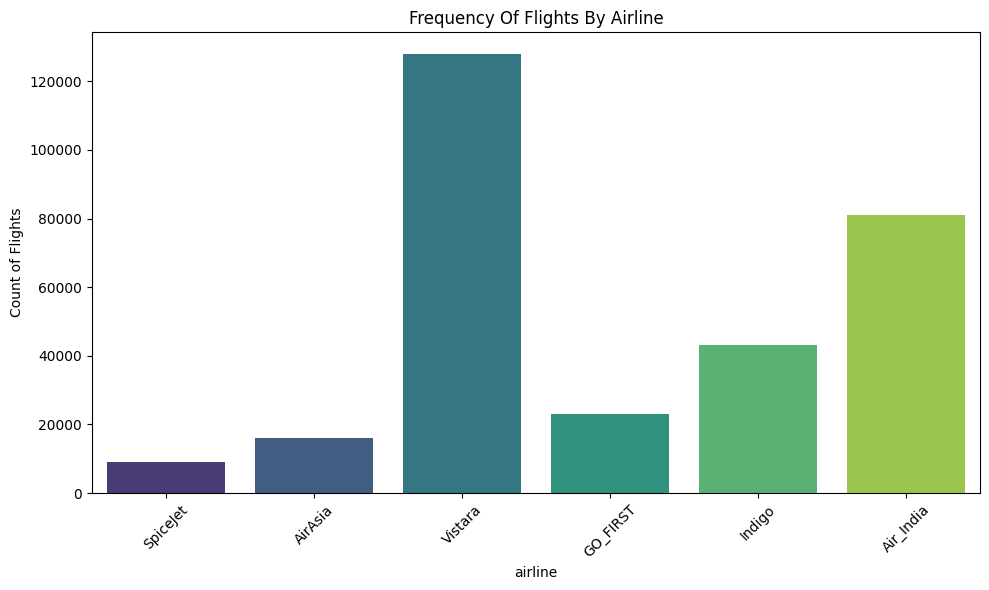

In [33]:
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sns.countplot(data=features, x='airline', palette='viridis')  # Adjust the color palette if needed
plt.title('Frequency Of Flights By Airline')  # Set the title of the plot
plt.xlabel('airline')  # X-axis label
plt.ylabel('Count of Flights')  # Y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Vistara becaming as a most popular Airline

In [34]:
df2=features.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

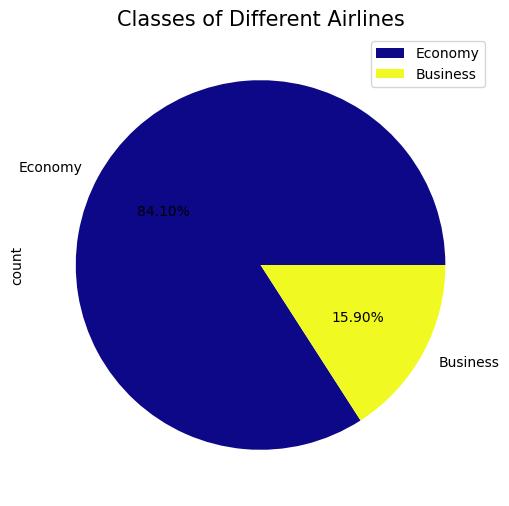

In [35]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap="plasma")
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

# Many people prefer economy class.

# Price varies by airline.

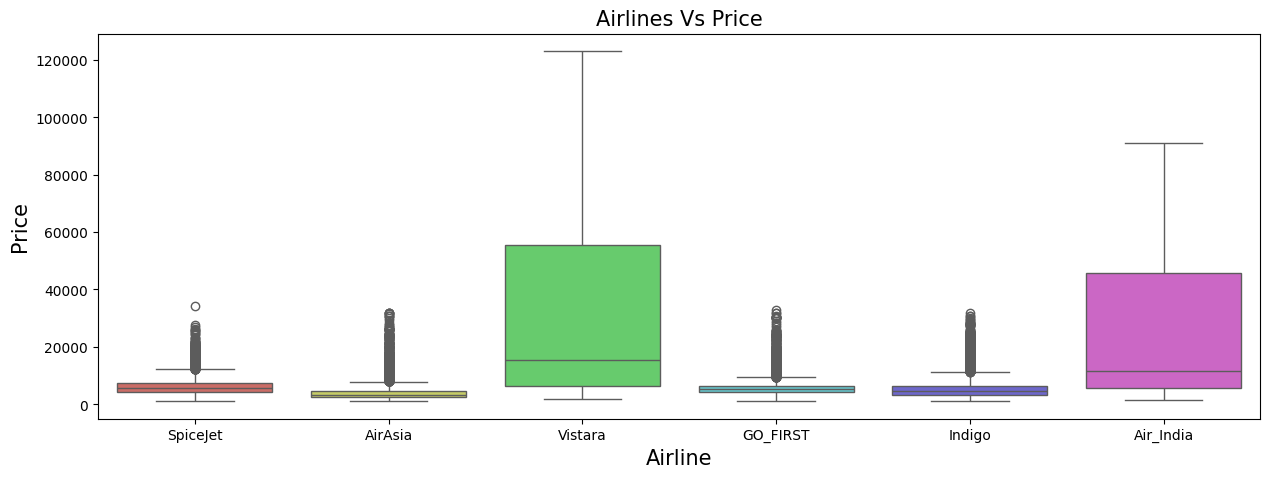

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x=features['airline'],y=target,palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

 # #As we can see Vistara has Maximum Price range

# How Does the Ticket Price vary between Economy and Business Class?¶

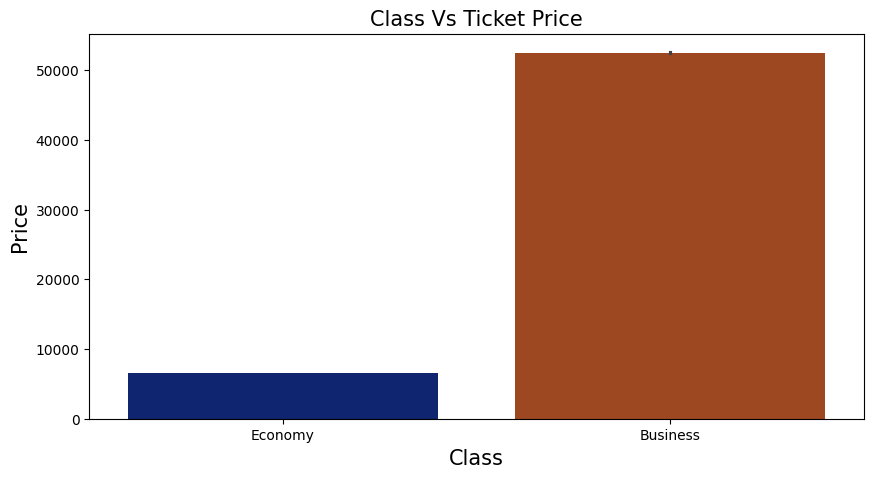

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='class',y=target,data=features,palette='dark')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


# Ticket Price is Maximum for Business Class when compared to Economy Class.

#  exploring the distribution of the target variable.

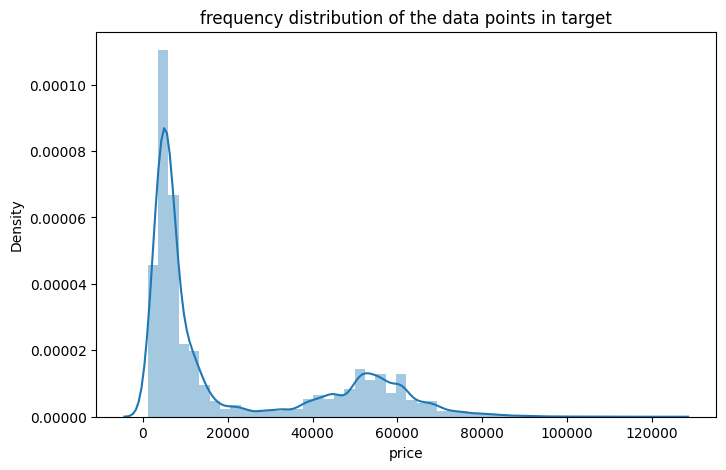

In [38]:
plt.figure(figsize=(8,5))
sns.distplot(target)
plt.title("frequency distribution of the data points in target")
plt.show()

# to get correlation for this columns ["stops","duration","days_left"] 

In [39]:
corr=features[["stops","duration","days_left"]]
corr.corr()

,stops,duration,days_left
stops,1.000000,0.467939,-0.008634
duration,0.467939,1.000000,-0.039180
days_left,-0.008634,-0.039180,1.000000


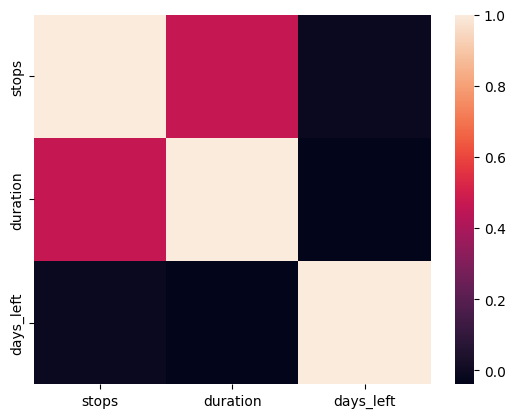

In [40]:
sns.heatmap(data=corr.corr())
plt.show()

# How the price changes with change in Source city and Destination city?

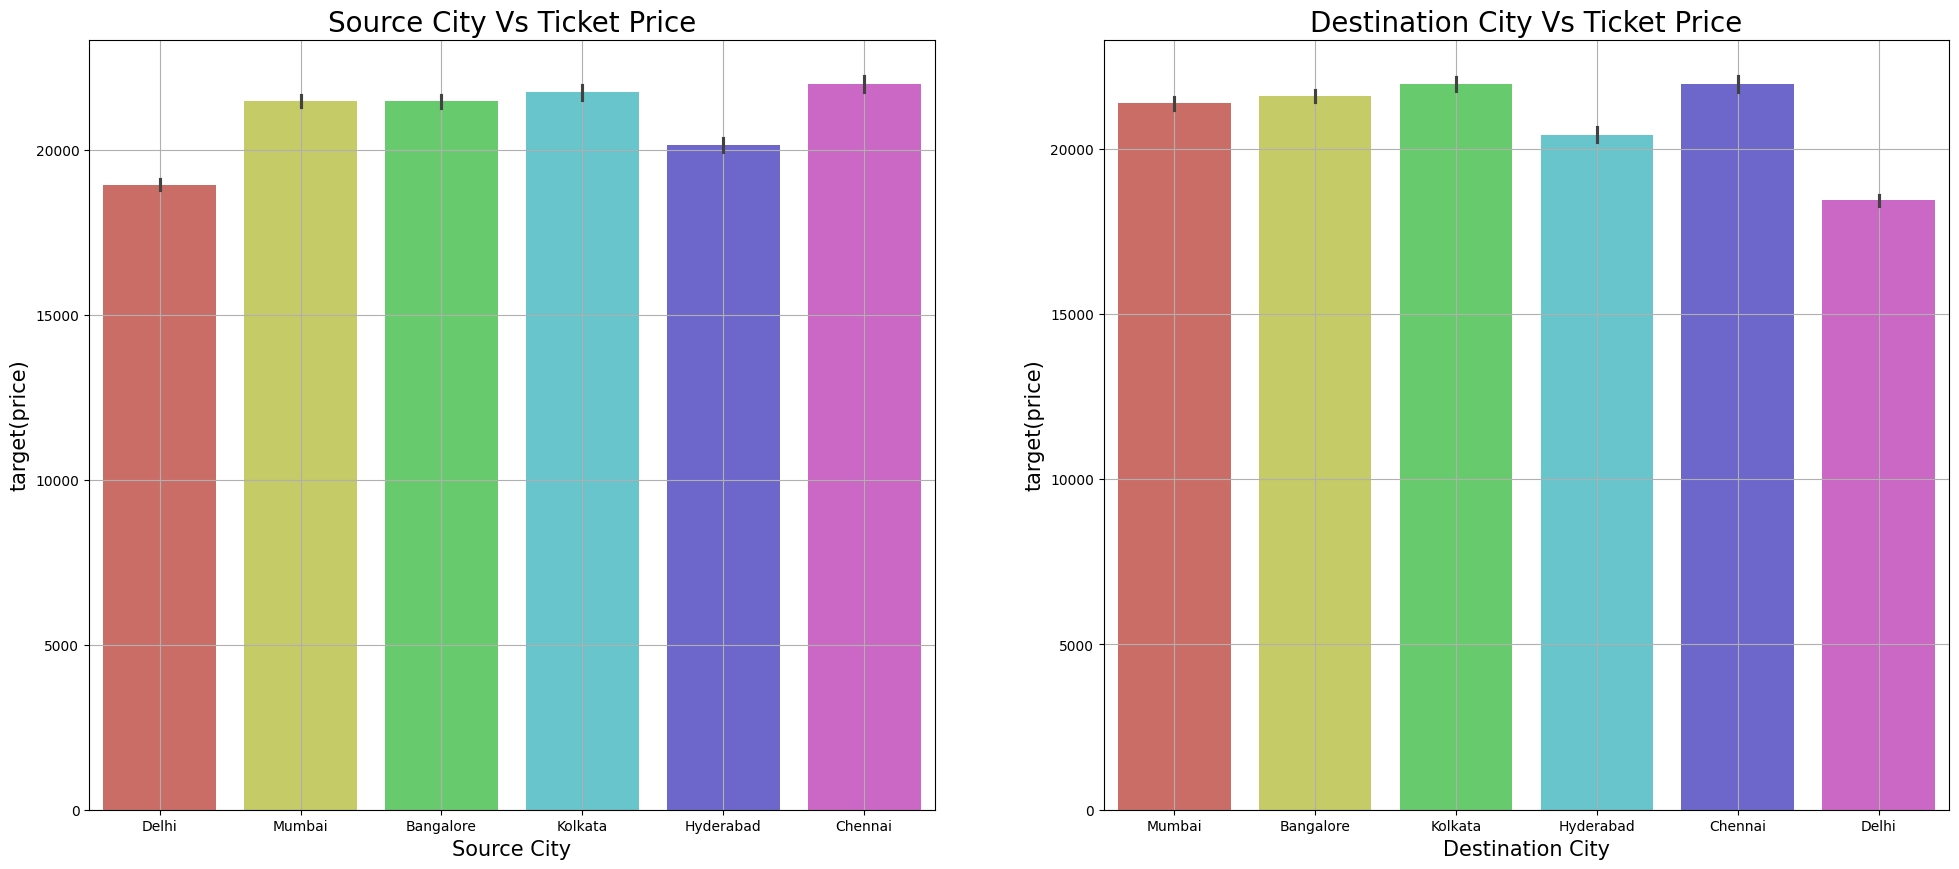

In [41]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x='source_city',y=target,data=features,palette="hls")
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel("target(price)",fontsize=15)
plt.grid()
plt.subplot(1,2,2)
sns.barplot(x='destination_city',y=target,data=features,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('target(price)',fontsize=15)
plt.grid()
plt.show()

In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sr.no             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


# Let's separate categorical column.

In [43]:
cat_data_cols=[]

for i in features.columns:
    if features[i].dtype=="object":
        
        cat_data_cols.append(i)

features_cat=features[cat_data_cols]

features_cat 

,airline,flight,source_city,departure_time,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,Evening,Hyderabad,Business


# Let's separate the numerical column.

In [44]:
numerical_data_col=[]

for i in features.columns:
    if features[i].dtype=="int64" or features[i].dtype=="float64":
        
        numerical_data_col.append(i)

features_numerical=features[numerical_data_col]

features_num_cols=features_numerical.iloc[:,1:]
features_num_cols

,stops,duration,days_left
0,0,2.17,1
1,1,2.33,1
2,0,2.17,1
3,0,2.25,1
4,0,2.33,1
...,...,...,...
300148,1,10.08,49
300149,1,10.42,49
300150,1,13.83,49
300151,1,10.00,49


# Using Label Encoder for converting categorical features into numerical features

In [53]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sr.no             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


In [54]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in features_cat:
    features_cat[i] = le.fit_transform(features_cat[i])
features_cat

,airline,flight,source_city,departure_time,arrival_time,destination_city,class
0,4,1408,2,2,5,5,1
1,4,1387,2,1,4,5,1
2,0,1213,2,1,1,5,1
3,5,1559,2,4,0,5,1
4,5,1549,2,4,4,5,1
...,...,...,...,...,...,...,...
300148,5,1477,1,4,2,3,0
300149,5,1481,1,0,5,3,0
300150,5,1486,1,1,5,3,0
300151,5,1483,1,1,2,3,0


# Concatenate the Numerical and Categorical Data

# Now, we can see all categorical features have been converted to numerical features

In [55]:
df_New=pd.concat((features_cat,features_num_cols),axis=1)
df_New

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,stops,duration,days_left
0,4,1408,2,2,5,5,1,0,2.17,1
1,4,1387,2,1,4,5,1,1,2.33,1
2,0,1213,2,1,1,5,1,0,2.17,1
3,5,1559,2,4,0,5,1,0,2.25,1
4,5,1549,2,4,4,5,1,0,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,2,3,0,1,10.08,49
300149,5,1481,1,0,5,3,0,1,10.42,49
300150,5,1486,1,1,5,3,0,1,13.83,49
300151,5,1483,1,1,2,3,0,1,10.00,49


# Splitting the data into x and y

In [56]:
X=df_New 
Y=target

In [58]:
X # this is prediction columns

,airline,flight,source_city,departure_time,arrival_time,destination_city,class,stops,duration,days_left
0,4,1408,2,2,5,5,1,0,2.17,1
1,4,1387,2,1,4,5,1,1,2.33,1
2,0,1213,2,1,1,5,1,0,2.17,1
3,5,1559,2,4,0,5,1,0,2.25,1
4,5,1549,2,4,4,5,1,0,2.33,1
...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,2,3,0,1,10.08,49
300149,5,1481,1,0,5,3,0,1,10.42,49
300150,5,1486,1,1,5,3,0,1,13.83,49
300151,5,1483,1,1,2,3,0,1,10.00,49


In [59]:
Y # is the target column

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

#  Our data is converted into numerical format

# Splitting the data into Train-Test set

In [61]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [62]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [63]:
# Scaling the values to convert the int values to Machine Learning compatible format
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0, 1)) # MinMaxScaler to scale features to a range of [0, 1]
mmscaler

MinMaxScaler()

In [64]:
X_train = mmscaler.fit_transform(X_train)
X_train

array([[1.        , 0.97179487, 0.4       , ..., 0.5       , 0.25693878,
        0.27083333],
       [1.        , 0.97307692, 0.6       , ..., 0.5       , 0.17857143,
        0.45833333],
       [1.        , 0.9525641 , 0.2       , ..., 0.5       , 0.21102041,
        0.58333333],
       ...,
       [0.2       , 0.54230769, 0.8       , ..., 0.5       , 0.26204082,
        0.58333333],
       [0.4       , 0.59230769, 0.8       , ..., 0.5       , 0.15306122,
        0.79166667],
       [0.2       , 0.53397436, 0.8       , ..., 0.5       , 0.39469388,
        0.33333333]])

In [65]:
X_test = mmscaler.fit_transform(X_test)
X_test # Scale the testing data based on the min and max values of the training set

array([[0.2       , 0.47948718, 0.4       , ..., 0.5       , 0.40323956,
        0.8125    ],
       [1.        , 0.92435897, 0.8       , ..., 0.5       , 0.19181586,
        0.85416667],
       [1.        , 0.93205128, 0.8       , ..., 0.5       , 0.20609548,
        0.83333333],
       ...,
       [0.6       , 0.01794872, 0.4       , ..., 0.        , 0.02855925,
        0.85416667],
       [0.6       , 0.21282051, 1.        , ..., 0.5       , 0.10123615,
        0.83333333],
       [0.4       , 0.71217949, 0.        , ..., 0.        , 0.0355925 ,
        0.91666667]])

In [66]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Model Building

# 1.RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score #R-squared metric to evaluate model accuracy (coefficient of determination)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_1 = r2_score(y_test, y_pred)
print("R-squared:", r2_1)

rounded_r2 = round(r2_1, 4)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9837911673190103
R-squared (rounded): 98.38


# 2.Ridge

In [68]:
# Linear regression model with L2 regularization (reduces overfitting)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred1 = ridge.predict(X_test)
r2_2 = r2_score(y_test, y_pred1)
print("R-squared:", r2_2)
rounded_r2 = round(r2_2, 4)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9062365993716569
R-squared (rounded): 90.62


# 3.DecisionTreeRegressor

In [69]:
from sklearn.tree import DecisionTreeRegressor # for modeling non-linear relationships)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)
r2_3 = r2_score(y_test, y_pred2)
print("R-squared:", r2_3)
rounded_r2 = round(r2_3, 4)
print("R-squared (rounded):", rounded_r2*100)


R-squared: 0.9724799484171539
R-squared (rounded): 97.25


# 4.LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression  # # Simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)
r2_4 = r2_score(y_test, y_pred3)
print("R-squared:", r2_4)
rounded_r2 = round(r2_4, 4)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9062364788329591
R-squared (rounded): 90.62


# 5.XGBoost

In [71]:
from xgboost import XGBRegressor # # XGBoost regressor, an efficient implementation of gradient boosting for regression
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred5 = XG.predict(X_test)
r2_6 = r2_score(y_test, y_pred5)
print("R-squared:", r2_6)
rounded_r2 = round(r2_6, 4)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9771108031272888
R-squared (rounded): 97.71


# 6.KNeighborsRegressor

In [72]:
from sklearn.neighbors import KNeighborsRegressor 
# K-Nearest Neighbors regression model (based on proximity of data points)
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred6 = knn.predict(X_test)
r2_7 = r2_score(y_test, y_pred6)
print("R-squared:", r2_7)
rounded_r2 = round(r2_7, 4)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.9715231363029817
R-squared (rounded): 97.15


# 7.GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient boosting regression model (boosting ensemble method)
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred7 = gbr.predict(X_test)
r2_8 = r2_score(y_test, y_pred7)
print("R-squared:", r2_8)
rounded_r2 = round(r2_8, 4)
print("R-squared (rounded):", rounded_r2*100)

R-squared: 0.957125216817784
R-squared (rounded): 95.71


In [74]:
Accuracy = [ r2_1, r2_2, r2_3, r2_4, r2_6, r2_7, r2_8 ]
Frame = pd.DataFrame({
'Model': ['RandomForestRegressor', 'Ridge','DecisionTreeRegressor','LinearRegression', 'XGBRegressor',
'KNeighborsRegressor', 'GradientBoostingRegressor'],
'Accuracy': Accuracy})
print(Frame)

                       Model  Accuracy
0      RandomForestRegressor  0.983791
1                      Ridge  0.906237
2      DecisionTreeRegressor  0.972480
3           LinearRegression  0.906236
4               XGBRegressor  0.977111
5        KNeighborsRegressor  0.971523
6  GradientBoostingRegressor  0.957125


# Acording to the above plots, best Model base on Score is RandomForestRegressor

# conclusion

# Which ml is best 

The accuracy of a model depends on the specific requirements of your machine learning task, including your dataset, use case, and evaluation metrics.
However, based on the scores you’ve shared (assuming they are 𝑅2 scores or another performance metric like accuracy):

Performance Analysis
Best Performer:

RandomForestRegressor has the highest score of 0.983791, suggesting it is likely capturing the patterns in the data better than the others.
Other Strong Performers:

XGBRegressor: 0.977111
DecisionTreeRegressor: 0.972480
KNeighborsRegressor: 0.971523
These models are also performing well, with 
𝑅2 values close to the Random Forest Regressor.

Lower Performers:

Ridge and LinearRegression both have scores around 0.9062, suggesting they may not capture complex relationships in the data as effectively as tree-based or ensemble models.
Middle Performer:

GradientBoostingRegressor has a respectable score of 0.957125, though it is not as high as RandomForest or XGB.
